# Linear Fit

In [208]:
# Import and process pendulum data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from iminuit import Minuit
import numpy as np
from scipy.stats import *

# Define the directory
directory = 'C:/Users/Mark/OneDrive - University of Copenhagen/UniversityOfCopenhagen/E23/AS/AS_lab/Pendulum/'

# Initialize an empty dictionary to store the dataframes
dataframes = {}

# Define the model function (linear)
def model(x, a, b):
    return a * x + b

n = 0
# Loop over all files in the directory
for filename in os.listdir(directory):
    # Check if the file is a .csv file
    if filename.endswith('.dat'):
        # Import the .csv file into pandas and set the column names as x and y
        df = pd.read_csv(os.path.join(directory, filename), delimiter="\t", names=["Oscillation Number", "Time"])
        # Add index to each data series
        df["Data Series"] = "Series " + str(0+n)
        # Store the dataframe in the dictionary with the filename as the key
        dataframes[filename] = df
        # increment counter
        n += 1

# Concatenate all the dataframes into one dataframe
dataframes_merged = pd.concat(dataframes.values(), ignore_index=True)
t_values = np.asarray( dataframes_merged['Time'] )
N_values = dataframes_merged['Oscillation Number']

# The filenames are the keys of the dictionary
filenames = list(dataframes.keys())

#############################################
Raw Data Analysis: meas_01_anna.dat
#############################################
Std Deviation: 0.06784802151624303
SEM: 0.013306091756537937

IQR: 0.07364897435745688
IQE: 0.05459523673643949

Skewness: -0.2260950993113007
Skewtest, z-score: -0.5568593012373081
Skewtest, p-value: 0.5776235633294611
Kurtosis: 0.46224365408474855


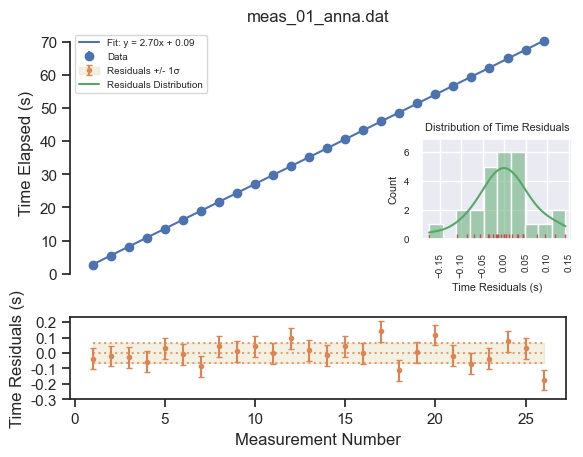

------------------------------------------------------------------------------------------------------------
#############################################
Raw Data Analysis: meas_01_dimitris.dat
#############################################
Std Deviation: 0.07774438485487369
SEM: 0.015246928286433396

IQR: 0.08825012820590228
IQE: 0.0654189237997793

Skewness: 0.11607257502839347
Skewtest, z-score: 0.2871753466108266
Skewtest, p-value: 0.7739780621928145
Kurtosis: -0.19621538197577904


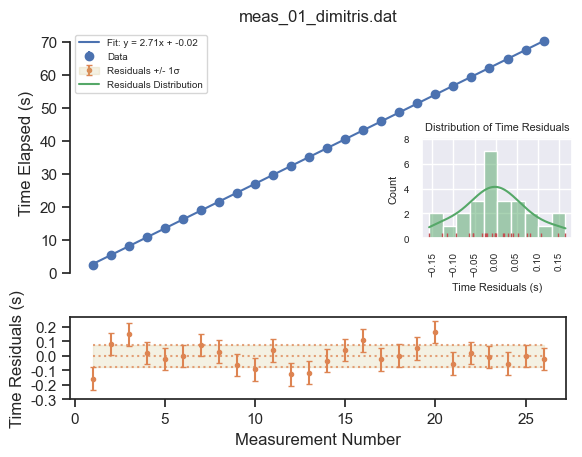

------------------------------------------------------------------------------------------------------------
#############################################
Raw Data Analysis: meas_01_gsev.dat
#############################################
Std Deviation: 0.10313436213368839
SEM: 0.01984821724686178

IQR: 0.140428540902807
IQE: 0.10409825122520903

Skewness: -0.11117394442199144
Skewtest, z-score: -0.2790764881642805
Skewtest, p-value: 0.7801861263046936
Kurtosis: -0.7312959124696485


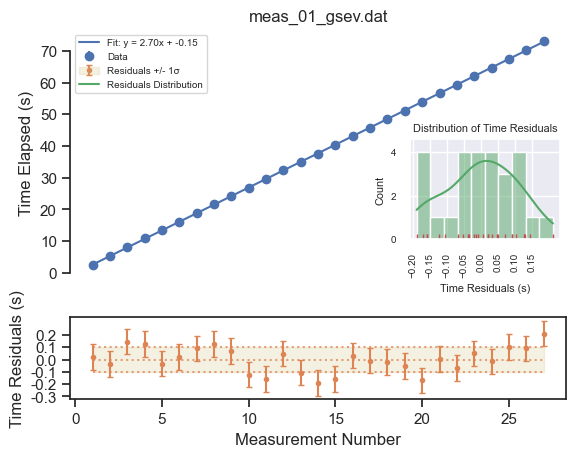

------------------------------------------------------------------------------------------------------------
#############################################
Raw Data Analysis: meas_01_gstavrog.dat
#############################################
Std Deviation: 0.04614008239797854
SEM: 0.009228016479595707

IQR: 0.046887692308061446
IQE: 0.03475737013199514

Skewness: 0.15033897082491113
Skewtest, z-score: 0.3660807372626122
Skewtest, p-value: 0.7143048307824669
Kurtosis: -0.3738927077844103


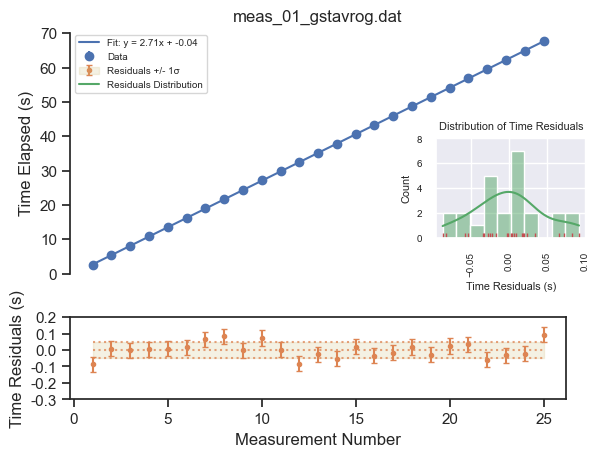

------------------------------------------------------------------------------------------------------------
#############################################
Raw Data Analysis: meas_01_Mark.dat
#############################################
Std Deviation: 0.043031724998048804
SEM: 0.008606344999609761

IQR: 0.053101538458566466
IQE: 0.03936363117758819

Skewness: -0.5789229302996091
Skewtest, z-score: -1.3624033261061856
Skewtest, p-value: 0.17307063464037986
Kurtosis: 0.19579330333700762


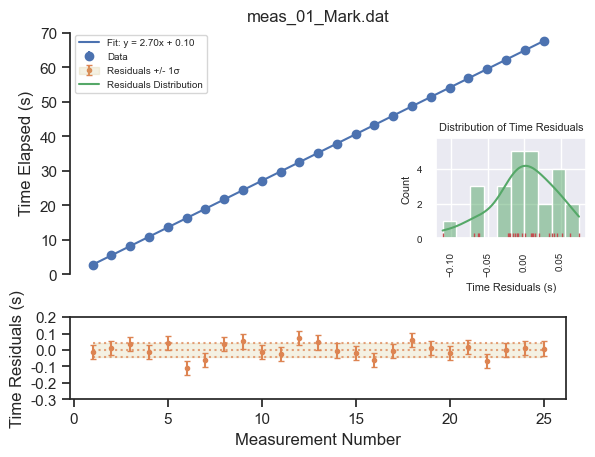

------------------------------------------------------------------------------------------------------------
#############################################
Raw Data Analysis: meas_02_anna.dat
#############################################
Std Deviation: 0.05055228157979703
SEM: 0.010110456315959405

IQR: 0.07034846153874241
IQE: 0.052148600102848344

Skewness: -0.14169513003218695
Skewtest, z-score: -0.3451352440771389
Skewtest, p-value: 0.7299926985288656
Kurtosis: 0.48010221309647116


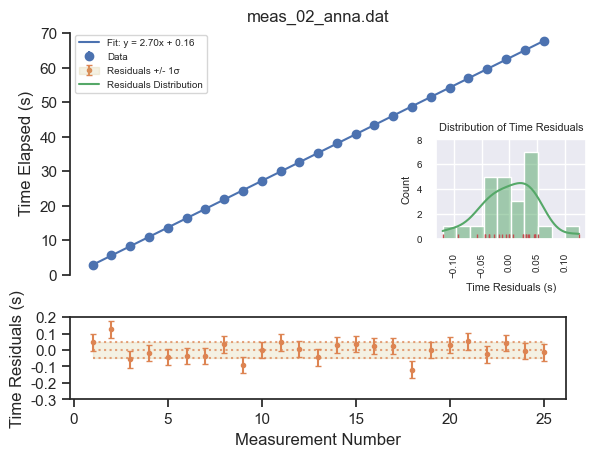

------------------------------------------------------------------------------------------------------------
#############################################
Raw Data Analysis: meas_02_gsev.dat
#############################################
Std Deviation: 0.0851426558177066
SEM: 0.01702853116354132

IQR: 0.08905246153814517
IQE: 0.0660136853507377

Skewness: -1.1826463231879385
Skewtest, z-score: -2.5451851529230445
Skewtest, p-value: 0.010921980868970895
Kurtosis: 1.0821469585738068


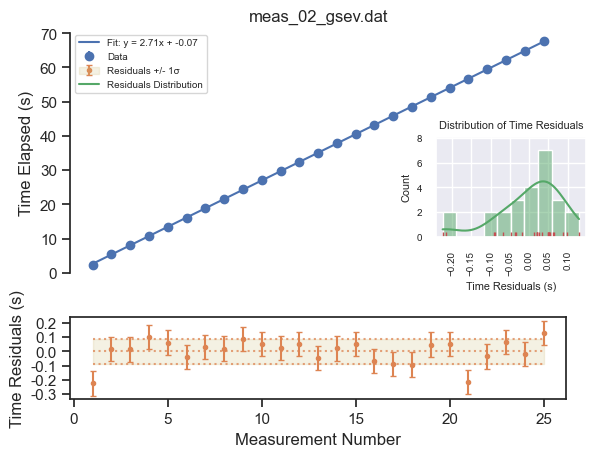

------------------------------------------------------------------------------------------------------------
#############################################
Raw Data Analysis: meas_02_gstavrog.dat
#############################################
Std Deviation: 0.06793874775232343
SEM: 0.01332388463531366

IQR: 0.05704202564145744
IQE: 0.04228467430797438

Skewness: -1.3822813620802294
Skewtest, z-score: -2.9100023410872593
Skewtest, p-value: 0.003614260488909007
Kurtosis: 1.9375566357314549


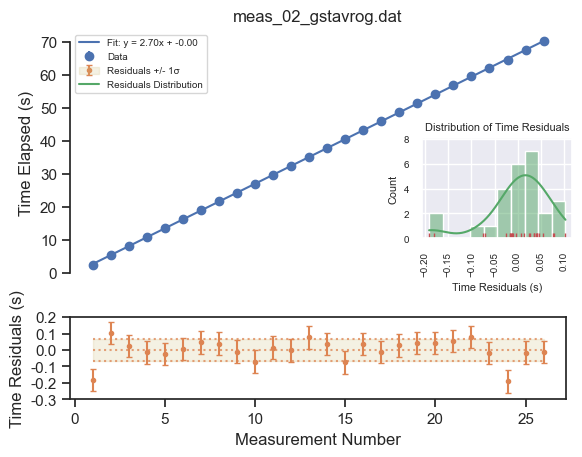

------------------------------------------------------------------------------------------------------------
#############################################
Raw Data Analysis: meas_02_Mark.dat
#############################################
Std Deviation: 0.05285961630874377
SEM: 0.010571923261748755

IQR: 0.047427538461494834
IQE: 0.03515755260303546

Skewness: -0.48892095951034714
Skewtest, z-score: -1.1621279463030276
Skewtest, p-value: 0.24518349720117671
Kurtosis: 0.8691280749703179


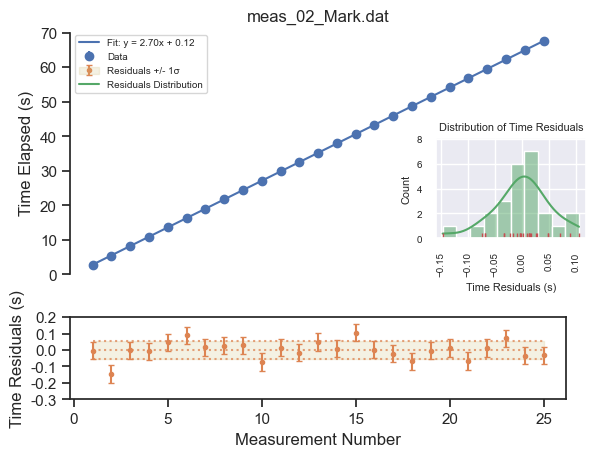

------------------------------------------------------------------------------------------------------------


In [224]:
# Linear fit - each dataframe

from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle
import multiprocessing
import scipy
import warnings
import seaborn as sns
from scipy.special import erfc


# Define the model function (linear)
def model(x, a, b):
    return a * x + b

# Initialize empty lists to store the std deviations and the mean values
std_devs = []
std_errs = []
inv_vars = []
T_mean_values = []
T_rms_vals = []

# Plot each dataframe with y as a function of x
for filename, df in dataframes.items():

    # Get the x and y values
    N = df['Oscillation Number']
    t = df['Time']
    # Extract period values from each df
    T = t.diff()
    T = T.dropna()
    T = T.reset_index(drop=True)

    # Define the cost function (sum of squared residuals)
    def cost(a, b):
        y_model = model(N, a, b)
        return np.sum((t - y_model) ** 2)

    # Create a Minuit object
    m = Minuit(cost, a=0, b=0)

    # Perform the minimization
    m.migrad()  # finds minimum of least_squares function
    #m.hesse()   # accurately computes uncertainties

    # Get the best fit parameters
    a = m.values['a']
    b = m.values['b']

    # Calculate the mean value of t
    T_mean = a
    T_mean_values = np.append(T_mean_values, T_mean)

    # Calculate the residuals
    residuals = t - model(N, a, b)
    # sort and fit the residuals
    t_residuals = sorted(residuals.values.tolist())
    residuals_fit = norm.pdf(t_residuals, np.mean(t_residuals), np.std(t_residuals))
    # Calculate the standard measurements
    std_dev = np.std(residuals)
    std_err = (std_dev/np.sqrt(len(N))) # dont trust the SEM. Confusion about when to use SEM and when to avoid it - only when Gaussian can be assumed?
    inverse_var = np.sqrt( 1/np.sum(1 / (std_dev**2)) ) # when to use the inverse variance method?

    # define local error variable
    error = std_dev
    # Append the standard deviation to the list
    std_devs.append(std_dev)
    std_errs.append(std_err)
    inv_vars.append(inverse_var)

    # Calculate error bars (assuming Gaussian statistics)
    #errors = std_dev * np.ones_like(t)
    errors = error * np.ones_like(t)

    #########################################
    ## Prints                              ##
    #########################################

    print("#############################################")
    print(f"Raw Data Analysis: {filename}")
    print("#############################################")

    print("Std Deviation: " + str(std_dev))
    print("SEM: " + str(std_err))
    IQR = iqr(t_residuals)

    # identifying outliers
    print("\nIQR: " + str(IQR))
    IQE = iqr(t_residuals)/1.349
    print("IQE: " + str(IQE))

    # skewness and kurtosis
    skewness = skew(t_residuals)
    print("\nSkewness: " + str(skewness))
    res = skewtest(t_residuals)
    res.statistic
    print("Skewtest, z-score: " + str(res.statistic))
    print("Skewtest, p-value: " + str(res.pvalue))
    kurto = kurtosis(t_residuals)
    print(f"Kurtosis: " + str(kurto))

    #######################
    ### Plots: Raw Date ###
    #######################

    sns.set_style("ticks")
    sns.set_context("notebook")
    sns.color_palette("deep")

    my_palette =  sns.color_palette("deep", 10)

    # plotting parameters
    Nbins = 10

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0.25, 'height_ratios': [3, 1]})

    # Plot the original data and the fitted line on the first subplot
    l1_err = ax1.errorbar(N, t, yerr=errors, fmt='o', color=my_palette[0], label='Data')
    N_values = np.linspace(min(N), max(N), 100)
    l1_fit, = ax1.plot(N_values, model(N_values, a, b), color=my_palette[0], label=f'Fit: y = {a:.2f}x + {b:.2f}')
    ax1.tick_params(bottom=False)

    # Plot the residuals and standard deviation on the second subplot
    l2_err = ax2.errorbar(N, residuals, yerr=errors, capsize=2.0,  fmt='.', color=my_palette[1], label="Data")
    ax2.hlines([0, -error, +error], min(N), max(N), ls=":", colors=my_palette[1], **{'alpha': 0.75})
    l2_band = ax2.fill_between(N_values, -error, error, color=my_palette[8], alpha=0.2)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax2.yaxis.set_ticks(np.arange(-0.3, 0.3, 0.1))

    # Set the title of the graph to the filename of the data-file
    ax1.set_title(filename)
    ax2.set_xlabel('Measurement Number')
    ax1.set_ylabel('Time Elapsed (s)')
    ax2.set_ylabel('Time Residuals (s)')
    # despine ax1
    sns.despine(ax=ax1, bottom=True, trim=True, offset=0)
    
    #########################################
    ## Inset axes                          ##
    #########################################    

    # Set style for inset axes
    sns.set_style("darkgrid")
    sns.set(font_scale=0.65)
    ax_inset = inset_axes(ax1,
                    width=1.5,                     # inch
                    height=1,                    # inch
                    bbox_transform=ax1.transData, # data coordinates
                    bbox_to_anchor=(19, 9),    # data coordinates
                    loc=3)                       # loc=lower left corner
    sns.histplot(x=t_residuals, kde=True, legend=True, bins=Nbins, ax=ax_inset, color=my_palette[2], label="Residuals Distribution") # stat="density"
    sns.rugplot(x=t_residuals, color=my_palette[3], height=0.05, ax=ax_inset)
    ax_inset.set(ylabel='Count', xlabel='Time Residuals (s)', title='Distribution of Time Residuals')
    ax_inset.set(yticks=range(0, 10, 2), xticks=np.arange(-0.2, 0.2, 0.05)) 
    plt.xticks(rotation=90)
    #l2=axs[1,1].axhline(y=0, c="gray", linestyle='dashed', label="Mean") 

    # Workaround for including inset_axes in legend
    # Set create placeholder line in same style as sns.histplot; set plotting range to 0 to avoid conflict
    l3_dist, = plt.plot(range(0, 0), label="Residuals Distribution")
    l3_dist.set_color(my_palette[2])

    # reset to main style before making the legend
    sns.set_style("ticks")
    # Create legend from custom artist/label lists
    l2_list = (l2_err, l2_band)
    handles = [l1_fit, l1_err, l2_list, l3_dist]
    labels = [l1_fit.get_label(), l1_err.get_label(), 'Residuals +/- 1σ', l3_dist.get_label()]
    ax1.legend(handles, labels)

    # Remove placeholder line from plot. Might not be necessary.
    l3_dist.remove()

    plt.show()

    print("------------------------------------------------------------------------------------------------------------")

# Convert lists to numpy arrays
std_devs = np.asarray(std_devs)
std_errs = np.asarray(std_errs)
inv_vars = np.asarray(inv_vars)

# Histograms

Mean: 2.7027
Weighted mean on T: 2.70 +/- 0.020
RMS: 2.70


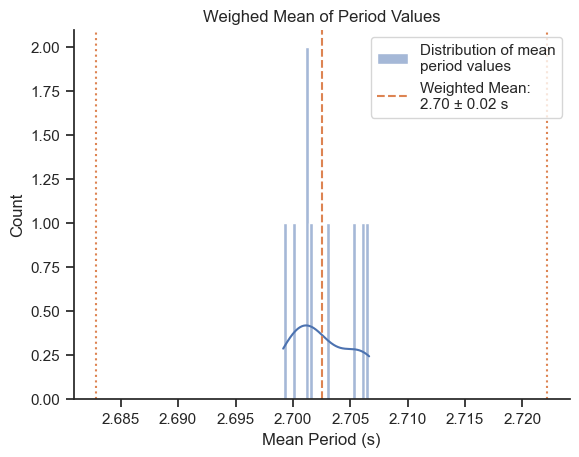

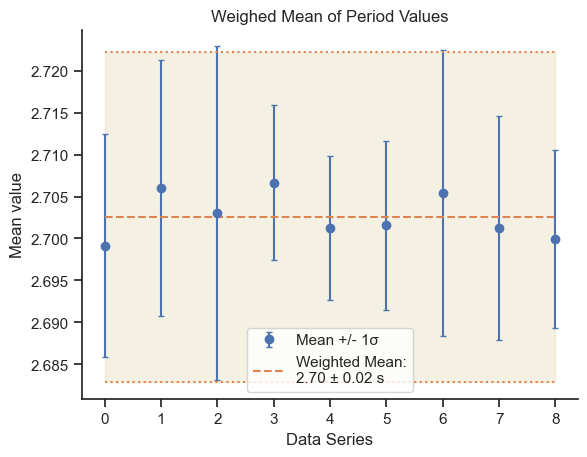

In [211]:
# Histogram - T_mean

## Weighted mean over whole dataset - using weights, w
#weights = 1 / (std_devs ** 2)
#weighted_mean = np.sum(T_mean_values * weights) / np.sum(weights)
#uncertainty_weighted_mean = np.sqrt(1 / np.sum(weights))

# Inverse-variance weighting
# https://en.wikipedia.org/wiki/Inverse-variance_weighting
#inverse_var_wmean = np.sum(T_mean_values / (std_devs**2))  / np.sum(1 / (std_devs**2)) 
#inverse_var_err = np.sqrt( 1/np.sum(1 / (std_devs**2)) )

## Calculate weights and weighted mean over whole dataset - no middle-step for weights
# https://ned.ipac.caltech.edu/level5/Leo/Stats4_5.html
weighted_mean = np.sum(T_mean_values / (std_devs**2)) / np.sum(1 / (std_devs**2))
# "the weighting factor is the inverse square of the error"
uncertainty_weighted_mean = np.sqrt(1 / np.sum(1 / (std_devs**2)))

# Prints
print(f"Mean: {np.mean(T_mean_values):.4f}")
print(f"Weighted mean on T: {weighted_mean:.2f} +/- {uncertainty_weighted_mean:.3f}")
print(f"RMS: {np.sqrt(np.mean(T_mean_values**2)):.2f}")

# Seaborn style settings
sns.set_style("ticks")
sns.set_context("notebook")
sns.color_palette("deep")

Nbins = 20
x = T_mean_values
y = np.array(len(T_mean_values))
ax1 = sns.histplot(x, bins=Nbins, color=my_palette[0], label="Distribution of mean\nperiod values", kde=True) #stat="density"
ax1.axvline(weighted_mean, ls='--', color=my_palette[1], label=f'Weighted Mean:\n{weighted_mean:.2f} ± {uncertainty_weighted_mean:.2f} s')
ax1.axvline(weighted_mean+uncertainty_weighted_mean, ls=':', color=my_palette[1])
ax1.axvline(weighted_mean-uncertainty_weighted_mean, ls=':', color=my_palette[1])

sns.despine(trim=False, offset=0, ax=ax1)
plt.xlabel('Mean Period (s)')
plt.ylabel('Count')
plt.title('Weighed Mean of Period Values')

# fix for changing artist order in legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.show()

########################
## Plot 2             ##
########################

# Seaborn style settings
sns.set_style("ticks")
sns.set_context("notebook")
sns.color_palette("deep")

# Local error variable
errors = std_errs

fig, ax = plt.subplots()
# Plot the mean values with error bars
l2 = ax.errorbar(np.arange(len(T_mean_values)), T_mean_values, yerr=errors, fmt='o', label='Mean and Error on the Mean', capsize=2, color=my_palette[0])

# plot the weighted mean
x = np.arange(len(T_mean_values))
y = np.ones_like(x) * weighted_mean
l1_mean, = ax.plot(x, y, "--", label=f'Weighted Mean:\n{weighted_mean:.2f} ± {uncertainty_weighted_mean:.2f} s', color=my_palette[1])

x = np.arange(len(T_mean_values))
y = np.ones_like(x) * (weighted_mean-uncertainty_weighted_mean)
plt.plot(x, y, ":", color=my_palette[1])
y = np.ones_like(x) * (weighted_mean+uncertainty_weighted_mean)
plt.plot(x, y, ":", color=my_palette[1])

plt.fill_between(x, weighted_mean-uncertainty_weighted_mean, weighted_mean+uncertainty_weighted_mean, color=my_palette[8], alpha=0.2, label='Uncertainty on Weighted Mean')

# Create legend from custom artist/label lists
handles = [l2, l1_mean]
labels = ["Mean +/- 1σ", l1_mean.get_label()] # get_label() "Weighted Mean +/- 1σ"
plt.legend(handles, labels, ncol=1)

sns.despine(trim=False, offset=0)
plt.title('Weighed Mean of Period Values')
plt.xlabel('Data Series')
plt.ylabel('Mean value')

##########
# Set style for inset axes
#sns.set_style("darkgrid")
#sns.set(font_scale=0.65)
#ax_inset = inset_axes(ax,
#                width=2,                     # inch
#                height=1.5,                    # inch
#                bbox_transform=ax.transData, # data coordinates
#                bbox_to_anchor=(7, 2.7),    # data coordinates
#                loc=3)                       # loc=lower left corner
#sns.histplot(x=t_residuals, kde=True, legend=True, bins=Nbins, ax=ax_inset, color=my_palette[2], label="Residuals Distribution") # stat="density"
#sns.histplot(x, bins=Nbins, color=my_palette[0], label="Distribution of mean\nperiod values", kde=True) #stat="density"
#sns.rugplot(x=t_residuals, color=my_palette[3], height=0.05, ax=ax_inset)
#ax_inset.set(ylabel='Count', xlabel='Time Residuals (s)', title='Distribution of Time Residuals')
#ax_inset.set(yticks=range(0, 10, 2), xticks=np.arange(-0.2, 0.2, 0.05)) 
#plt.xticks(rotation=90)
##########

plt.show()


# 2nd Linear Fit | Chi2 Test of Independence

Probability: 0.00
Critical value: 36.42

Chi-squared/Ndof: 47.09/24.00=1.96

P(Chi2 = 47.09, Ndof = 24) = 0.0032703762
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 47.09 (χ²/ndof = 2.0)      │              Nfcn = 70               │
│ EDM = 1.46e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

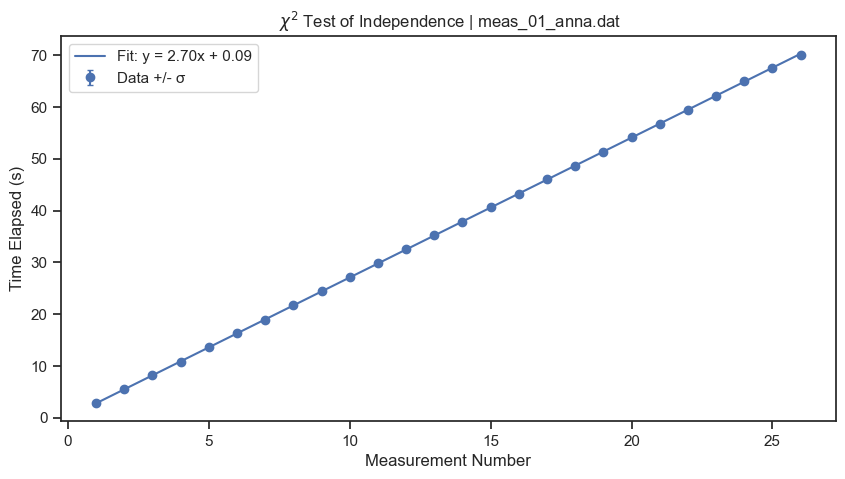

Probability: 0.01
Critical value: 36.42

Chi-squared/Ndof: 39.11/24.00=1.63

P(Chi2 = 39.11, Ndof = 24) = 0.0265825256
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 39.11 (χ²/ndof = 1.6)      │              Nfcn = 70               │
│ EDM = 5.89e-19 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

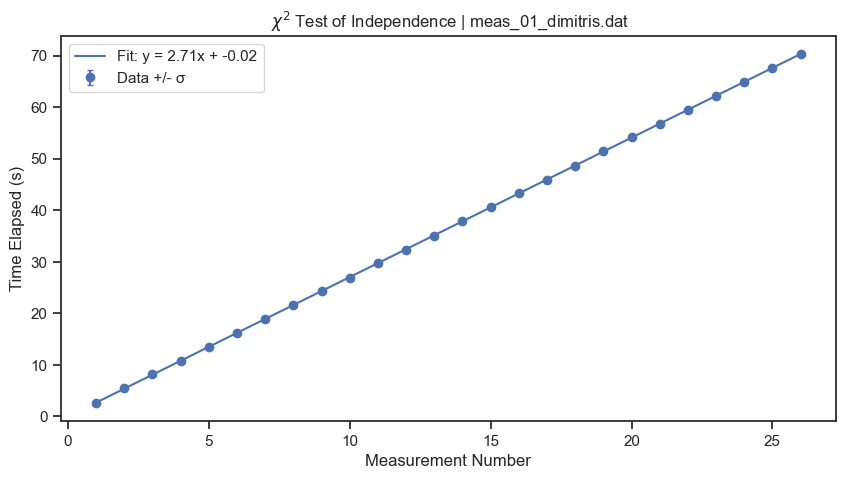

Probability: 0.02
Critical value: 37.65

Chi-squared/Ndof: 35.99/25.00=1.44

P(Chi2 = 35.99, Ndof = 25) = 0.0718087506
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 35.99 (χ²/ndof = 1.4)      │              Nfcn = 70               │
│ EDM = 5.02e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

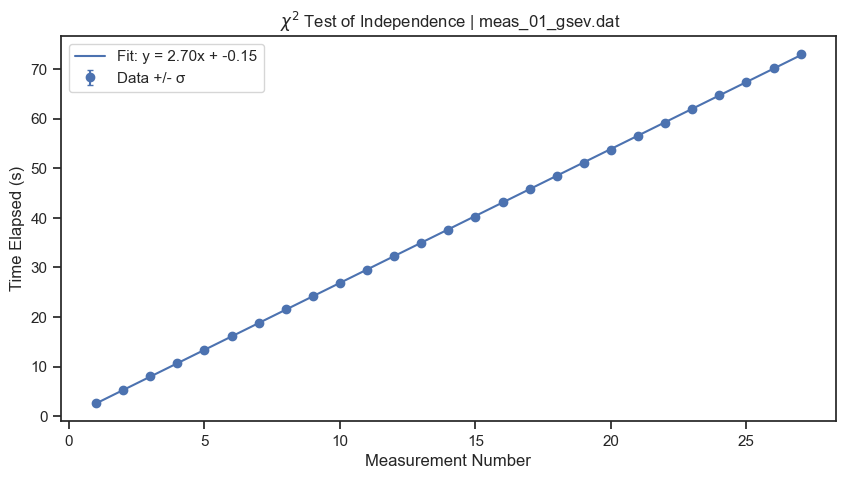

Probability: 0.02
Critical value: 35.17

Chi-squared/Ndof: 31.84/23.00=1.38

P(Chi2 = 31.84, Ndof = 23) = 0.1035142646
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 31.84 (χ²/ndof = 1.4)      │              Nfcn = 50               │
│ EDM = 4.04e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

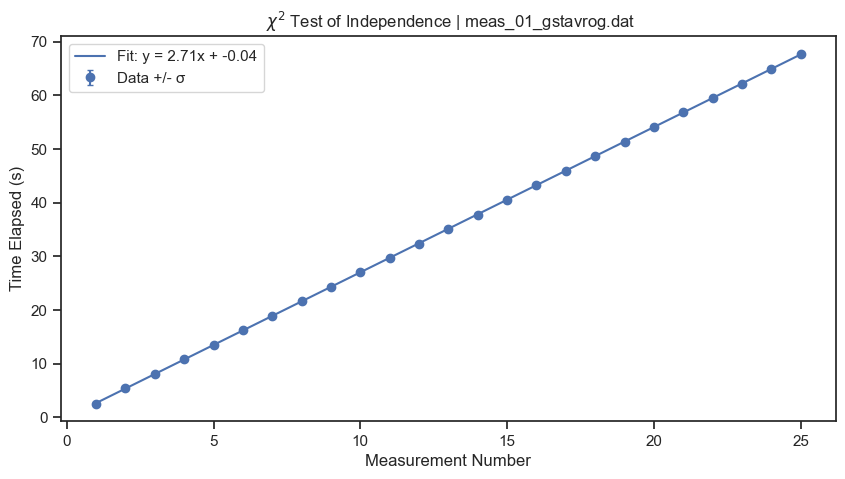

Probability: 0.06
Critical value: 35.17

Chi-squared/Ndof: 23.36/23.00=1.02

P(Chi2 = 23.36, Ndof = 23) = 0.4397318786
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 23.36 (χ²/ndof = 1.0)      │              Nfcn = 50               │
│ EDM = 6.24e-19 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

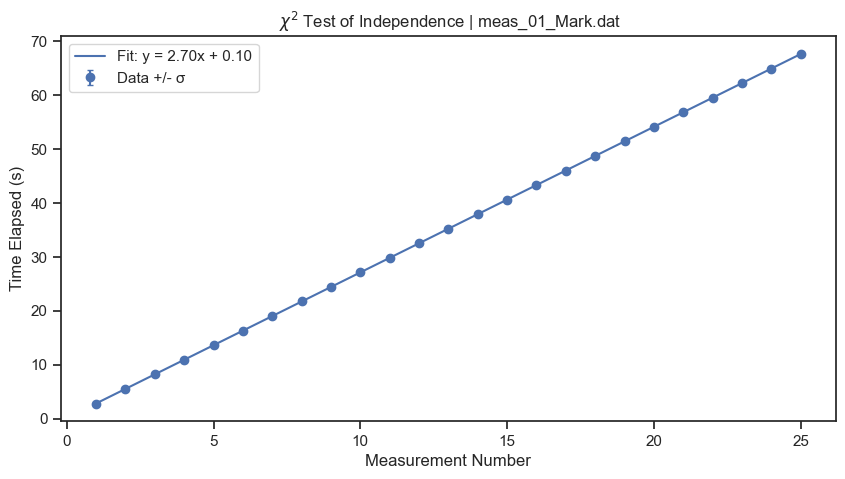

Probability: 0.00
Critical value: 35.17

Chi-squared/Ndof: 47.53/23.00=2.07

P(Chi2 = 47.53, Ndof = 23) = 0.0019229983
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 47.53 (χ²/ndof = 2.1)      │              Nfcn = 54               │
│ EDM = 2.15e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

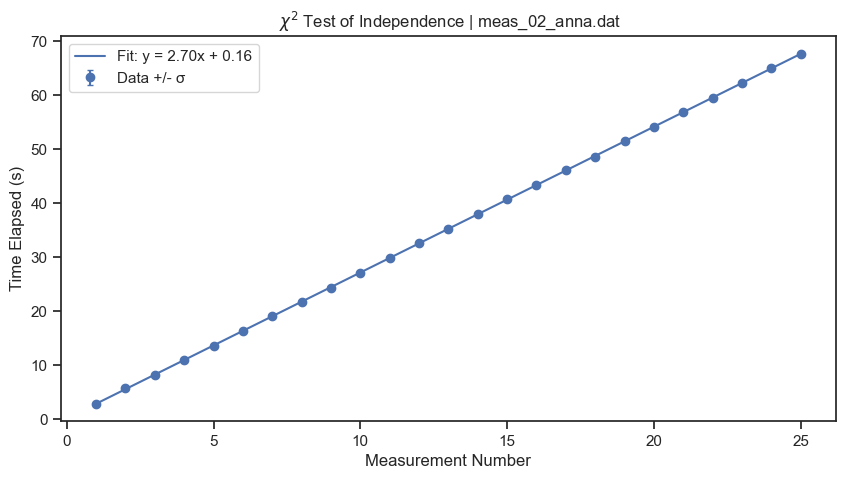

Probability: 0.02
Critical value: 35.17

Chi-squared/Ndof: 33.69/23.00=1.46

P(Chi2 = 33.69, Ndof = 23) = 0.0698200157
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 33.69 (χ²/ndof = 1.5)      │              Nfcn = 68               │
│ EDM = 6.86e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

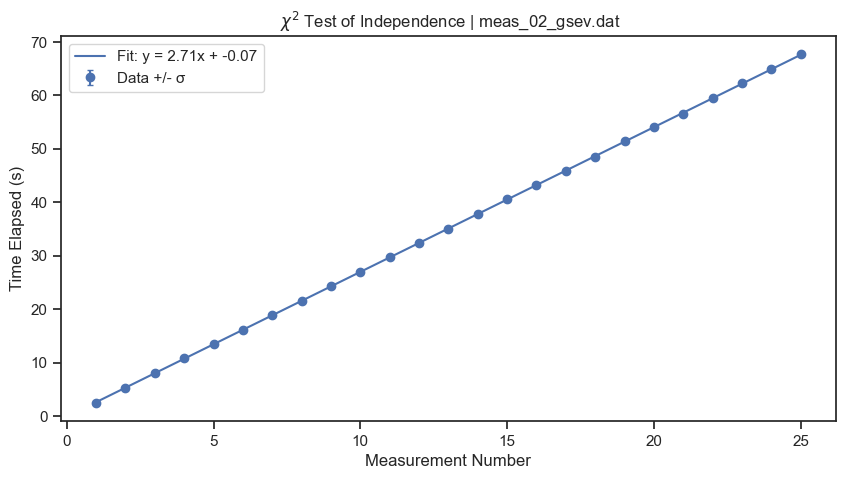

Probability: 0.01
Critical value: 36.42

Chi-squared/Ndof: 38.88/24.00=1.62

P(Chi2 = 38.88, Ndof = 24) = 0.0281288492
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 38.88 (χ²/ndof = 1.6)      │              Nfcn = 52               │
│ EDM = 1.08e-19 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

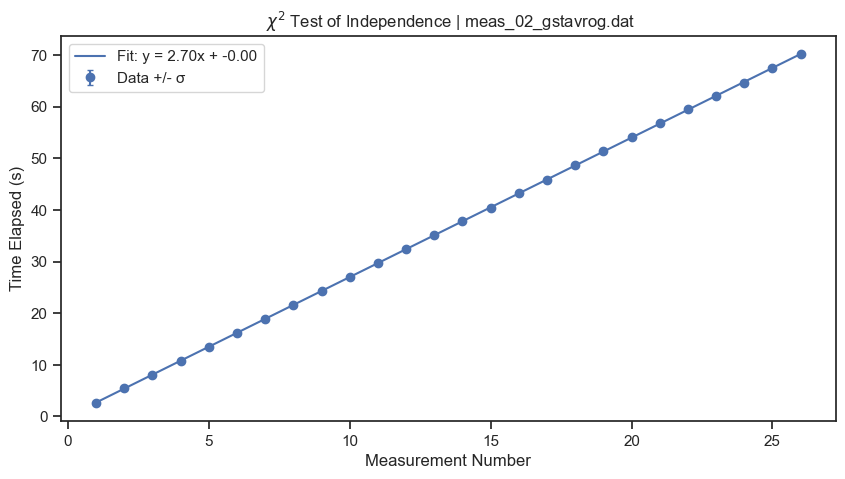

Probability: 0.01
Critical value: 35.17

Chi-squared/Ndof: 36.12/23.00=1.57

P(Chi2 = 36.12, Ndof = 23) = 0.0400716898
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 36.12 (χ²/ndof = 1.6)      │              Nfcn = 68               │
│ EDM = 2.64e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

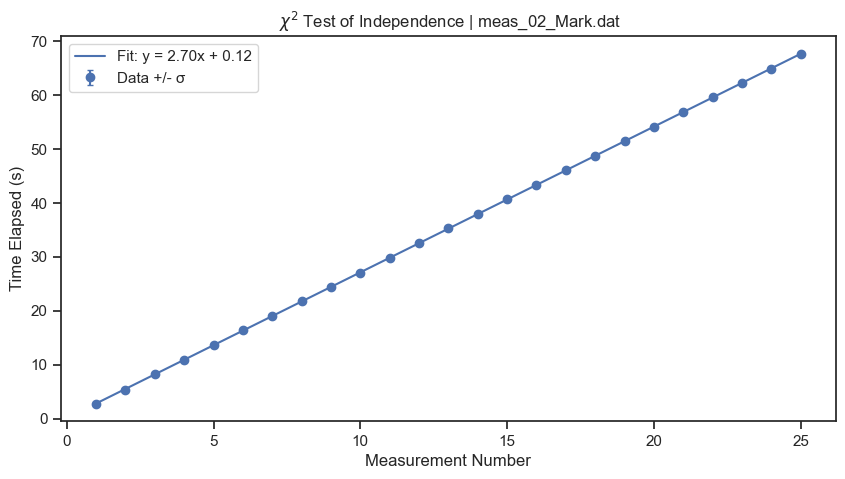

In [218]:
# Chi2 Test of Independece per data series
# Uses same data as the linear fit above 
# - but also inputs the error from each person (time residuals). Correct approach?

import matplotlib.pyplot as plt
import seaborn as sns
from iminuit import Minuit
from iminuit.util import describe
from typing import Annotated
import numpy as np
from scipy.stats import chi2

def model(x, a: float, b: float):
    return a*x + b                # model for predicting t(N) from N -> slope = T_i ?

# Plot each dataframe with y as a function of x
for (filename, df), std_dev, std_err in zip(dataframes.items(), std_devs, std_errs):

    N = df['Oscillation Number']
    t = df['Time']
    # local plotting vars
    x = N
    y = t
    
    # local error variable
    # Use std error on the mean / std deviation from the linear fit
    # - or recalculate the residuals locally?
    error = std_dev
    #error = std_err

    # lsq model form minuit tutorial. Good or bad choice - black box solution?
    least_squares = LeastSquares(x, y, error, model)

    # Create a Minuit object
    m = Minuit(least_squares, a=0, b=0)

    # finds minimum of least_squares function
    # Using the simplex method first (followed by Migrad) can be useful for asymptotes. Might apply to the GoF case?
    # Read about simplex here: https://iminuit.readthedocs.io/en/stable/notebooks/basic.html
    #m.simplex().migrad()
    m.migrad()

    # Get the best fit parameters
    a = m.values['a']
    b = m.values['b']

    # Degrees of freedom variable
    Ndof = len(y) - len(m.values[:])

    # Calculate the Chi-squared value
    chi2_value = m.fval 

    # Calculate the p-value
    p_value = chi2.sf(chi2_value, df=Ndof) 

    # Calculate the critical value
    crit_value = chi2.isf(.05, df=Ndof)

    # Calculate the probability
    Chi2_prob = chi2.pdf(chi2_value, df=Ndof)

    # Print the Chi-squared value and the p-value
    print(f"Probability: {Chi2_prob:.2f}")
    print(f"Critical value: {crit_value:.2f}")
    print(f"\nChi-squared/Ndof: {chi2_value:.2f}/{Ndof:.2f}={(chi2_value / Ndof):.2f}") 
    print(f"\nP(Chi2 = {chi2_value:.2f}, Ndof = {Ndof:d}) = {p_value:6.10f}")

    # Create a scatter plot of the mean values with error bars
    plt.figure(figsize=(10, 5))
    plt.errorbar(x, y, yerr=error, fmt='o', label='Data +/- σ', capsize=2)

    # Plot the best fit line
    #x = np.arange(len(T_mean_values))
    plt.plot(x, model(x, a, b), color=my_palette[0], label=f'Fit: y = {a:.2f}x + {b:.2f}')

    # plot the mean # values from lin fit?
    #x = np.arange(len(T_mean_values))
    #y = np.ones_like(x) * weighted_mean
    #plt.plot(x, y, "r:", dashes=(5, 10), label='Mean')

    #x = np.arange(len(T_mean_values))
    #y = (np.ones_like(x) * weighted_mean ) - uncertainty_weighted_mean
    #x = np.arange(len(T_mean_values))
    #y = (np.ones_like(x) * weighted_mean ) + uncertainty_weighted_mean
    #plt.fill_between(x, weighted_mean-uncertainty_weighted_mean, weighted_mean+uncertainty_weighted_mean, color='gray', alpha=0.2, label='Uncertainty on Weighted Mean')

    ####################################################################
    ############ use SNS to fill area between mean and chi2 fit !!!!  ##
    ####################################################################

    print(m.migrad())

    plt.title(fr' $\chi^2$ Test of Independence | {filename}')
    plt.xlabel('Measurement Number')
    plt.ylabel('Time Elapsed (s)')
    plt.legend()
    plt.show()

# Chi2: Goodness of Fit

Probability: 2.3284784962880405e-06
Critical value: 14.067140449340167

Chi-squared/Ndof: 0.0029915074947326342

Prob(Chi2 = 0.02, Ndof = 8) = 1.0000

Fit: y = 2.70355x + -0.00020


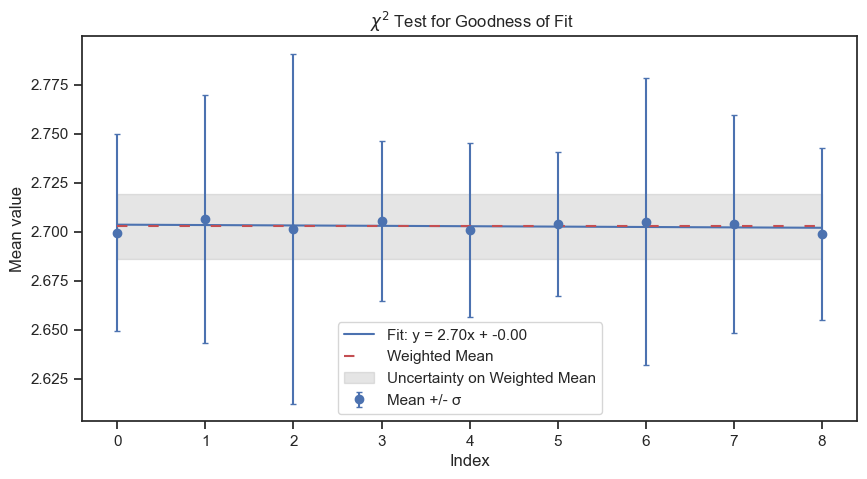

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.02393 (χ²/ndof = 0.0)    │              Nfcn = 140              │
│ EDM = 1.34e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

In [219]:
# Chi2 GoF test for whole dataset

import matplotlib.pyplot as plt
import seaborn as sns
from iminuit import Minuit
from iminuit.util import describe
from typing import Annotated
import numpy as np
from scipy.stats import chi2
from iminuit.cost import LeastSquares

# Local error variable
#errors = std_errs
errors = std_devs

# Model for returning a constant value (?)
#def model(x, b: float):
#    b = np.ones_like(T_mean_values) * weighted_mean
#    return b

# Linear model
def model(x, a: float, b: float):
    return a + b * x

# custom cost model from definition of chi2
# Define the cost function (Chi-squared)
#def chi_squared(b, x, y, y_err):
#    y_model = model(x, b)
#    return np.sum(((y - y_model) / y_err) ** 2)

# built-in cost function imported via iminuit.cost
least_squares = LeastSquares(np.arange(len(T_mean_values)).tolist(), T_mean_values, errors, model)

# Create a Minuit object
#m = Minuit(lambda b: chi_squared(b, np.arange(len(T_mean_values)), T_mean_values, errors), b=0)
#m = Minuit(lambda a, b: chi_squared(a, b, N, t, error), a=0, b=0)
m = Minuit(least_squares, a=0, b=0)

# finds the minimum of the Minuit object
# Using the simplex method first (followed by Migrad) can be useful for asymptotes. Might apply to this GoF case?
# Read about simplex here: https://iminuit.readthedocs.io/en/stable/notebooks/basic.html
m.simplex().migrad()

# Get the best fit parameters
a = m.values['a']
b = m.values['b']

# Calculate the Chi-squared value
chi2_value = m.fval #chi_squared(b, np.arange(len(T_mean_values)), T_mean_values, std_errs)

# Calculate the p-value
p_value = chi2.sf(chi2_value, df=(len(T_mean_values) - len(m.values[:]))) 

# Calculate the critical value
crit_value = chi2.isf(.05, df=(len(T_mean_values) - len(m.values[:])))

# Calculate the probability
Chi2_prob = chi2.pdf(chi2_value, df=(len(T_mean_values) - len(m.values[:])))

#Ndof = len(T_mean_values) - len(m.values[:])
Ndof = len(T_mean_values) - 1

# Print the Chi-squared value and the p-value
print(f"Probability: {Chi2_prob}")
print(f"Critical value: {crit_value}")
print(f"\nChi-squared/Ndof: {chi2_value / Ndof}") 
print(f"\nProb(Chi2 = {chi2_value:.2f}, Ndof = {Ndof:d}) = {p_value:6.4f}")
print(f'\nFit: y = {a:.5f}x + {b:.5f}')

# Create a scatter plot of the mean values with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(np.arange(len(T_mean_values)), T_mean_values, yerr=errors, fmt='o', label='Mean +/- σ', capsize=2)

# Plot the best fit line
x = np.arange(len(T_mean_values))
plt.plot(x, model(x, a, b), color=my_palette[0], label=f'Fit: y = {a:.2f}x + {b:.2f}')

# plot the weighted mean
x = np.arange(len(T_mean_values))
y = np.ones_like(x) * weighted_mean
plt.plot(x, y, "r:", dashes=(5, 10), label='Weighted Mean')

x = np.arange(len(T_mean_values))
y = (np.ones_like(x) * weighted_mean ) - uncertainty_weighted_mean
x = np.arange(len(T_mean_values))
y = (np.ones_like(x) * weighted_mean ) + uncertainty_weighted_mean
plt.fill_between(x, weighted_mean-uncertainty_weighted_mean, weighted_mean+uncertainty_weighted_mean, color='gray', alpha=0.2, label='Uncertainty on Weighted Mean')

#N_values = np.linspace(min(N), max(N), 100)
#plt.fill_between(N_values, -error, error, color='gray', alpha=0.2)
####################################################################
############ use SNS to fill area between mean and chi2 fit !!!!  ##
####################################################################

plt.title(r' $\chi^2$ Test for Goodness of Fit')
plt.xlabel('Index')
plt.ylabel('Mean value')
plt.legend()
plt.show()

print(m.simplex().migrad())

# ----------------------------------------------------------------

# Removing Outliers

#############################################
Outlier Detection Using Chauvenet's Criterion
#############################################


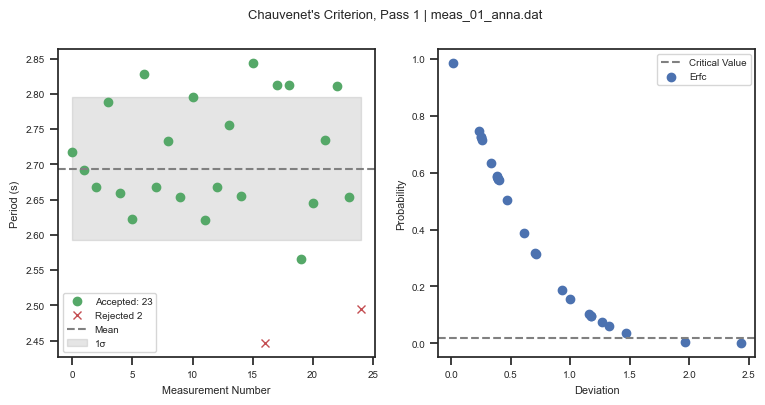

Chauvenet's Criterion, pass 1:
    t_Chauvenet
0        2.8123
3        5.5051
4        8.2614
5       11.0024
6       13.6310
7       16.3399
8       19.0419
9       21.6407
10      24.4289
11      27.0979
12      29.8621
13      32.5226
14      35.3189
15      37.9157
16      40.5921
17      43.2448
18      46.0094
19      48.7255
20      51.3460
21      54.1263
22      56.8834
23      59.4796
24      62.1807


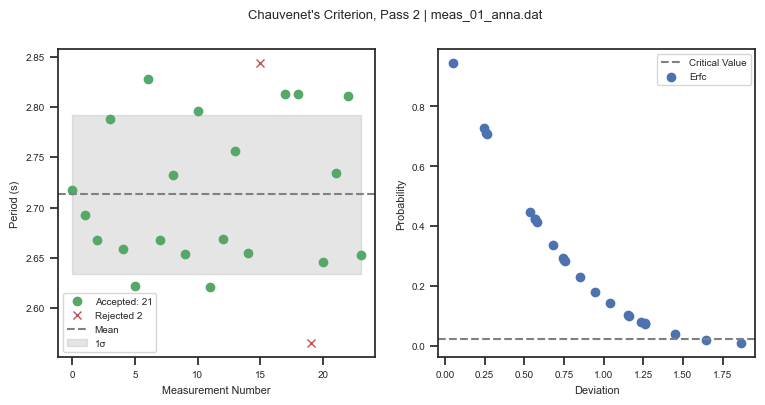

Chauvenet's Criterion, pass 2:
    t_Chauvenet
0        2.8123
3        5.5051
4        8.2614
5       11.0024
6       13.6310
7       16.3399
8       19.0419
9       21.6407
10      24.4289
11      27.0979
12      29.8621
13      32.5226
14      35.3189
15      37.9157
16      40.5921
17      43.2448
18      46.0094
19      48.7255
20      51.3460
21      54.1263
22      56.8834
23      59.4796
24      62.1807
Number of accepted values: 21
Number of rejected values: 4
[]
#############################################
Data Analysis After Outlier Detection
#############################################
Std Deviation: 0.05041742573556201
SEM: 0.011001984275144169

IQR: 0.06753056336706598
IQE: 0.050059720805830966

Skewness: -0.11133695695293679
Skewtest, z-score: -0.2544305988209754
Skewtest, p-value: 0.7991629141232077
Kurtosis: -0.3458183862288191


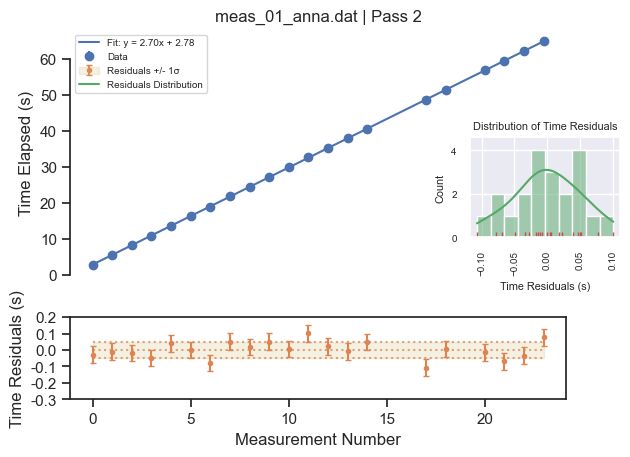

------------------------------------------------------------------------------------------------------------
#############################################
Outlier Detection Using Chauvenet's Criterion
#############################################


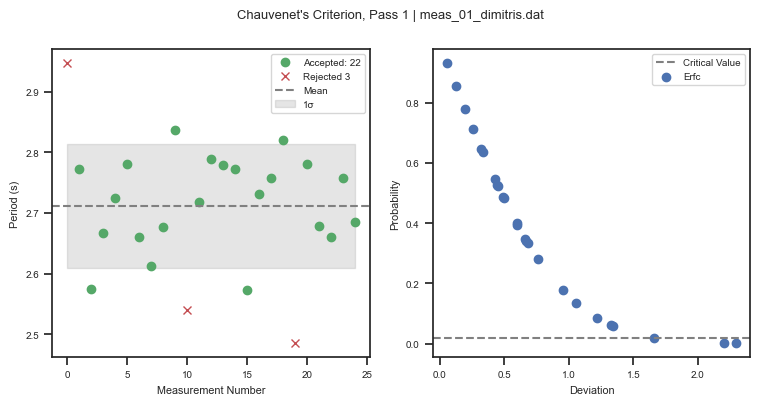

Chauvenet's Criterion, pass 1:
    t_Chauvenet
0        2.8123
3        5.5051
4        8.2614
5       11.0024
6       13.6310
7       16.3399
8       19.0419
9       21.6407
10      24.4289
11      27.0979
12      29.8621
13      32.5226
14      35.3189
15      37.9157
16      40.5921
17      43.2448
18      46.0094
19      48.7255
20      51.3460
21      54.1263
22      56.8834
23      59.4796
24      62.1807


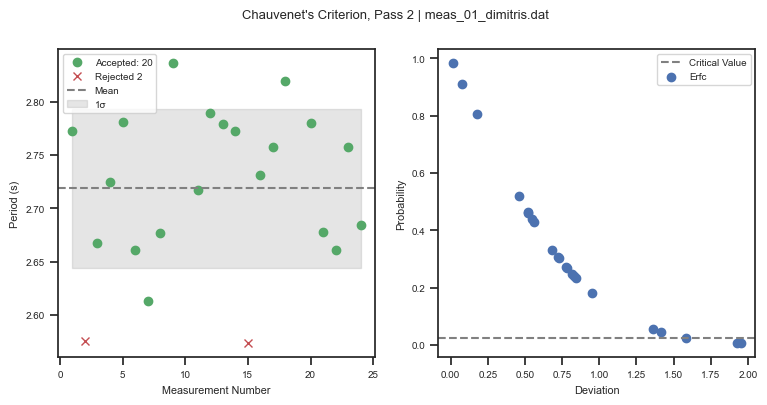

Chauvenet's Criterion, pass 2:
    t_Chauvenet
0        2.8123
3        5.5051
4        8.2614
5       11.0024
6       13.6310
7       16.3399
8       19.0419
9       21.6407
10      24.4289
11      27.0979
12      29.8621
13      32.5226
14      35.3189
15      37.9157
16      40.5921
17      43.2448
18      46.0094
19      48.7255
20      51.3460
21      54.1263
22      56.8834
23      59.4796
24      62.1807
Number of accepted values: 21
Number of rejected values: 4
[ 0.000363   -0.00651266]
#############################################
Data Analysis After Outlier Detection
#############################################
Std Deviation: 0.06338750176031449
SEM: 0.013832286901466082

IQR: 0.0792836193176214
IQE: 0.05877214182180979

Skewness: -0.35255145787542735
Skewtest, z-score: -0.7965415987334794
Skewtest, p-value: 0.42571730688203135
Kurtosis: -0.5644298331797173


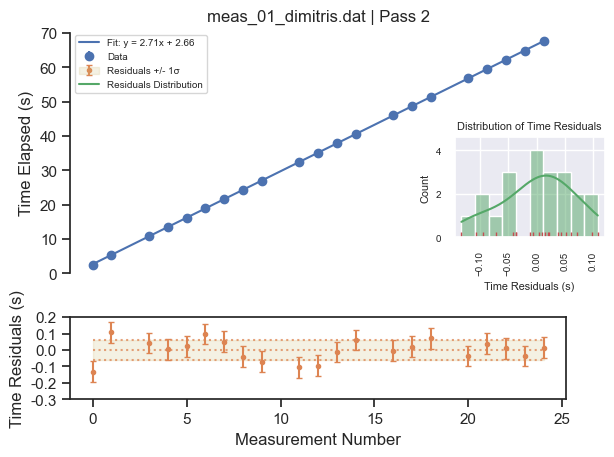

------------------------------------------------------------------------------------------------------------
#############################################
Outlier Detection Using Chauvenet's Criterion
#############################################


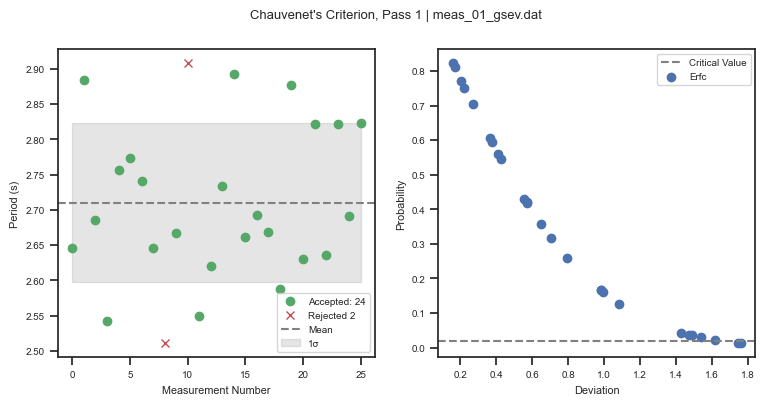

Chauvenet's Criterion, pass 1:
    t_Chauvenet
0        2.8123
3        5.5051
4        8.2614
5       11.0024
6       13.6310
7       16.3399
8       19.0419
9       21.6407
10      24.4289
11      27.0979
12      29.8621
13      32.5226
14      35.3189
15      37.9157
16      40.5921
17      43.2448
18      46.0094
19      48.7255
20      51.3460
21      54.1263
22      56.8834
23      59.4796
24      62.1807


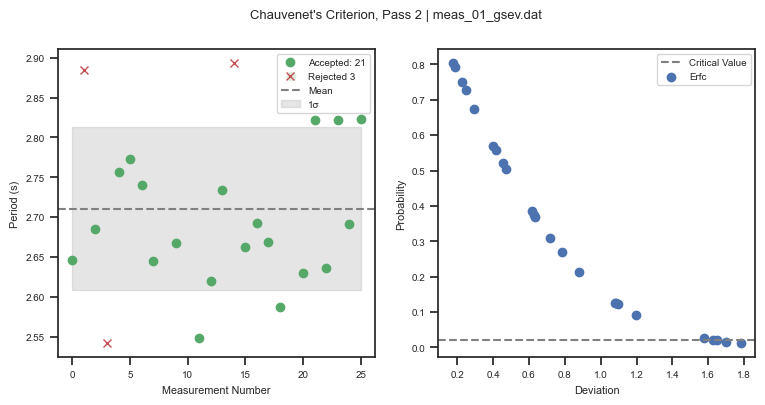

Chauvenet's Criterion, pass 2:
    t_Chauvenet
0        2.8123
3        5.5051
4        8.2614
5       11.0024
6       13.6310
7       16.3399
8       19.0419
9       21.6407
10      24.4289
11      27.0979
12      29.8621
13      32.5226
14      35.3189
15      37.9157
16      40.5921
17      43.2448
18      46.0094
19      48.7255
20      51.3460
21      54.1263
22      56.8834
23      59.4796
24      62.1807
Number of accepted values: 21
Number of rejected values: 5


ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [226]:
# Linear fit - each dataframe

from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle
import multiprocessing
import scipy
import warnings
import seaborn as sns
from scipy.special import erfc


def chauvenet(array, plot=False, Npass: int = 1):
    mean = array.mean()           # Mean of incoming array
    stdv = array.std()            # Standard deviation
    N = len(array)                # Lenght of incoming array
    criterion = 1.0/(2*N)         # Chauvenet's criterion
    d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's
    prob = erfc(d)                # Area normal dist.
    mask = prob < criterion       # Boolean mask for values that do not meet the criterion
    
    # Print the false array values and corresponding d values
    #print(f"False array values (deviation):\n{array[mask]} ({d[mask]})") 
    #return array[~mask]           # Return true array values    
    if plot == True:
        fig,axs = plt.subplots(1, 2, figsize=(9, 4))
        axs[0].plot(array.index[~mask], array[~mask], 'o', color="g", label=f'Accepted: {len(array[~mask])}') # range
        axs[0].plot(array.index[mask], array[mask], 'x', color='r', label=f'Rejected {len(array[mask])}') #range
        axs[0].axhline(y=mean, c="gray", linestyle='dashed', label="Mean")
        axs[0].fill_between(array.index, mean-stdv, mean+stdv, color='gray', alpha=0.2, label="1σ")

        axs[1].axhline(y=criterion, c="gray", linestyle='dashed', label="Critical Value")
        axs[1].scatter(d.sort_values(ascending=True), erfc(d.sort_values(ascending=True)), label="Erfc", color='b') # Plot the error function d
        
        axs[0].set_xlabel('Measurement Number')
        axs[0].set_ylabel('Period (s)')
        axs[1].set_xlabel('Deviation')
        axs[1].set_ylabel('Probability')
        axs[0].legend()
        axs[1].legend()

        plt.suptitle(f"Chauvenet's Criterion, Pass {Npass} | {filename}")
        return plt.show()
    if plot == False:
        d_values = array[~mask]
        index_values = array.index[~mask]
        df_chauvenet = pd.DataFrame({'t_Chauvenet': d_values})
        return df_chauvenet #return indexed df with accepted values

# Define the model function (linear)
def model(x, a, b):
    return a * x + b

# Initialize empty lists to store the std deviations and the mean values
std_devs = []
std_errs = []
inv_vars = []
T_mean_values = []
T_rms_vals = []

T_mean_pass = []
std_devs_pass = []
std_errs_pass = []

# Plot each dataframe with y as a function of x
for filename, df in dataframes.items():

    # Get the x and y values
    N = df['Oscillation Number']
    t = df['Time']
    # Extract period values from each df
    T = t.diff()
    T = T.dropna()
    T = T.reset_index(drop=True)

    # Define the cost function (sum of squared residuals)
    def cost(a, b):
        y_model = model(N, a, b)
        return np.sum((t - y_model) ** 2)

    # Create a Minuit object
    m = Minuit(cost, a=0, b=0)

    # Perform the minimization
    m.migrad()  # finds minimum of least_squares function
    #m.hesse()   # accurately computes uncertainties

    # Get the best fit parameters
    a = m.values['a']
    b = m.values['b']

    # Calculate the mean value of t
    T_mean = a
    T_mean_values = np.append(T_mean_values, T_mean)

    # Calculate the residuals
    residuals = t - model(N, a, b)
    # sort and fit the residuals
    t_residuals = sorted(residuals.values.tolist())
    residuals_fit = norm.pdf(t_residuals, np.mean(t_residuals), np.std(t_residuals))
    # Calculate the standard measurements
    std_dev = np.std(residuals)
    std_err = (std_dev/np.sqrt(len(N))) # dont trust the SEM. Confusion about when to use SEM and when to avoid it - only when Gaussian can be assumed?
    inverse_var = np.sqrt( 1/np.sum(1 / (std_dev**2)) ) # when to use the inverse variance method?

    # define local error variable
    error = std_dev
    # Append the standard deviation to the list
    std_devs.append(std_dev)
    std_errs.append(std_err)
    inv_vars.append(inverse_var)

    # Calculate error bars (assuming Gaussian statistics)
    #errors = std_dev * np.ones_like(t)
    errors = error * np.ones_like(t)
    
    #######################
    ## Outlier Detection ##
    #######################
    print("#############################################")
    print("Outlier Detection Using Chauvenet's Criterion")
    print("#############################################")
    
    ## pass 1 ##
    # True returns graphs
    chauvenet(T, plot=True)
    plt.show()

    # False returns array of accepted values
    T_chauvenet = chauvenet(T, plot=False)
    print(f"Chauvenet's Criterion, pass 1:\n{t_chauvenet}")

    ## pass 2 ##
    chauvenet(T_chauvenet['t_Chauvenet'], plot=True, Npass=2)
    plt.show()

    T_chauvenet = chauvenet(T_chauvenet['t_Chauvenet'], plot=False)

    # clean up after last pass    
    T_chauvenet.loc[0] = df['Time'].loc[0]
    T_chauvenet.sort_index(inplace=True)
    # Define a mask for slicing T
    chauvenet_mask = T_chauvenet.index.values
    
    print(f"Chauvenet's Criterion, pass 2:\n{t_chauvenet}")
    print(f"Number of accepted values: {len(T_chauvenet)}")
    print(f"Number of rejected values: {len(T) - len(T_chauvenet)}")
    print(T_mean_pass-T_mean_values)

    #####################
    ### Plots: Pass 2 ###
    #####################

    # Pass 1 reduced the skewness and the curtosis, and pass 2 even further.
    # No plots after pass 1, but can easily be done if desired

    # defining local variable for the plots
    t = t.loc[chauvenet_mask]
    N = t.loc[chauvenet_mask].index

    # Define the cost function (sum of squared residuals)
    m = Minuit(cost, a=0, b=0)
    m.migrad()

    a = m.values['a']
    b = m.values['b']
    T_mean = a
    T_mean_pass = np.append(T_mean_pass, T_mean)

    # Calculate the residuals
    residuals = t - model(N, a, b)
    # sort and fit the residuals
    t_residuals = sorted(residuals.values.tolist())
    residuals_fit = norm.pdf(t_residuals, np.mean(t_residuals), np.std(t_residuals))
    # Calculate the standard measurements
    std_dev = np.std(residuals)
    std_err = (std_dev/np.sqrt(len(N)))
    std_devs_pass.append(std_dev)
    std_errs_pass.append(std_err)
    
    # define local error variable
    error = std_dev
    # Calculate error bar values
    # Errors bars in final dist will be Poisson distriubted (counts)
    errors = error * np.ones_like(t)

    print("#############################################")
    print(f"Data Analysis After Outlier Detection")
    print("#############################################")

    print("Std Deviation: " + str(std_dev))
    print("SEM: " + str(std_err))
    IQR = iqr(t_residuals)

    # identifying outliers
    print("\nIQR: " + str(IQR))
    IQE = iqr(t_residuals)/1.349
    print("IQE: " + str(IQE))

    # skewness and kurtosis
    skewness = skew(t_residuals)
    print("\nSkewness: " + str(skewness))
    res = skewtest(t_residuals)
    res.statistic
    print("Skewtest, z-score: " + str(res.statistic))
    print("Skewtest, p-value: " + str(res.pvalue))
    kurto = kurtosis(t_residuals)
    print(f"Kurtosis: " + str(kurto))

    sns.set_style("ticks")
    sns.set_context("notebook")
    sns.color_palette("deep")

    my_palette =  sns.color_palette("deep", 10)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0.25, 'height_ratios': [3, 1]})

    # Plot the original data and the fitted line on the first subplot
    l1_err = ax1.errorbar(N, t, yerr=errors, fmt='o', color=my_palette[0], label='Data')
    N_values = np.linspace(min(N), max(N), 100)
    l1_fit, = ax1.plot(N_values, model(N_values, a, b), color=my_palette[0], label=f'Fit: y = {a:.2f}x + {b:.2f}')
    ax1.tick_params(bottom=False)

    # Plot the residuals and standard deviation on the second subplot
    l2_err = ax2.errorbar(N, residuals, yerr=errors, capsize=2.0,  fmt='.', color=my_palette[1], label="Data")
    ax2.hlines([0, -error, +error], min(N), max(N), ls=":", colors=my_palette[1], **{'alpha': 0.75})
    l2_band = ax2.fill_between(N_values, -error, error, color=my_palette[8], alpha=0.2)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax2.yaxis.set_ticks(np.arange(-0.3, 0.3, 0.1))

    # Set the title of the graph to the filename of the data-file
    ax1.set_title(f"{filename} | Pass 2")
    ax2.set_xlabel('Measurement Number')
    ax1.set_ylabel('Time Elapsed (s)')
    ax2.set_ylabel('Time Residuals (s)')
    # despine ax1
    sns.despine(ax=ax1, bottom=True, trim=True, offset=0)

    # inset axes

    # Set style for inset axes
    sns.set_style("darkgrid")
    sns.set(font_scale=0.65)
    ax_inset = inset_axes(ax1,
                    width=1.5,                     # inch
                    height=1,                    # inch
                    bbox_transform=ax1.transData, # data coordinates
                    bbox_to_anchor=(19, 9),    # data coordinates
                    loc=3)                       # loc=lower left corner
    sns.histplot(x=t_residuals, kde=True, legend=True, bins=Nbins, ax=ax_inset, color=my_palette[2], label="Residuals Distribution") # stat="density"
    sns.rugplot(x=t_residuals, color=my_palette[3], height=0.05, ax=ax_inset)
    ax_inset.set(ylabel='Count', xlabel='Time Residuals (s)', title='Distribution of Time Residuals')
    ax_inset.set(yticks=range(0, 10, 2), xticks=np.arange(-0.2, 0.2, 0.05)) 
    plt.xticks(rotation=90)
    #l2=axs[1,1].axhline(y=0, c="gray", linestyle='dashed', label="Mean") 

    # Workaround for including inset_axes in legend
    # Set create placeholder line in same style as sns.histplot; set plotting range to 0 to avoid conflict
    l3_dist, = plt.plot(range(0, 0), label="Residuals Distribution")
    l3_dist.set_color(my_palette[2])

    # reset to main style before making the legend
    sns.set_style("ticks")
    # Create legend from custom artist/label lists
    l2_list = (l2_err, l2_band)
    handles = [l1_fit, l1_err, l2_list, l3_dist]
    labels = [l1_fit.get_label(), l1_err.get_label(), 'Residuals +/- 1σ', l3_dist.get_label()]
    ax1.legend(handles, labels)

    # Remove placeholder line from plot. Might not be necessary.
    l3_dist.remove()

    plt.show()

    print("------------------------------------------------------------------------------------------------------------")

# Convert lists to numpy arrays
std_devs = np.asarray(std_devs)
std_errs = np.asarray(std_errs)
inv_vars = np.asarray(inv_vars)

std_devs_pass = np.asarray(std_devs_pass)
std_errs_pass = np.asarray(std_errs_pass)

Mean: 2.7028
Weighted mean on T: 2.70 +/- 0.017
RMS: 2.70


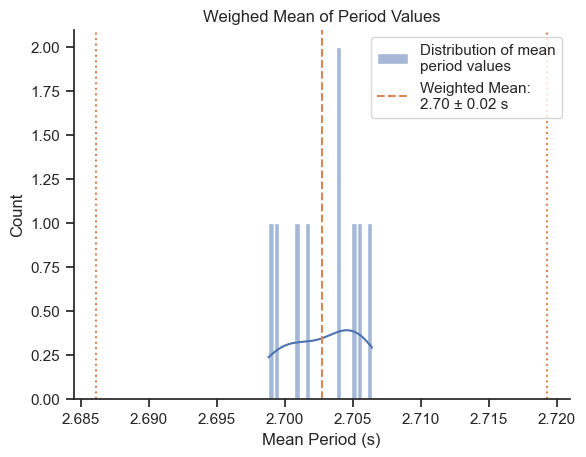

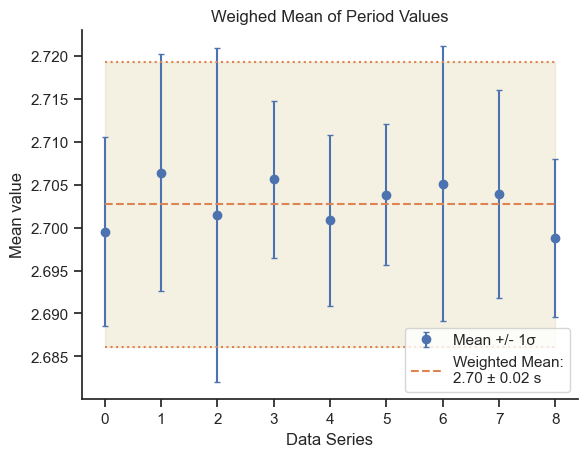

In [222]:
# introducing passed data via local vars
std_devs = std_devs_pass 
std_errs = std_errs_pass
T_mean_values = T_mean_pass

# Histogram - T_mean

## Calculate weights and weighted mean over whole dataset - no middle-step for weights
# https://ned.ipac.caltech.edu/level5/Leo/Stats4_5.html
weighted_mean = np.sum(T_mean_values / (std_devs**2)) / np.sum(1 / (std_devs**2))
# "the weighting factor is the inverse square of the error"
uncertainty_weighted_mean = np.sqrt(1 / np.sum(1 / (std_devs**2)))

# Prints
print(f"Mean: {np.mean(T_mean_values):.4f}")
print(f"Weighted mean on T: {weighted_mean:.2f} +/- {uncertainty_weighted_mean:.3f}")
print(f"RMS: {np.sqrt(np.mean(T_mean_values**2)):.2f}")

# Seaborn style settings
sns.set_style("ticks")
sns.set_context("notebook")
sns.color_palette("deep")

Nbins = 20
x = T_mean_values
y = np.array(len(T_mean_values))
ax1 = sns.histplot(x, bins=Nbins, color=my_palette[0], label="Distribution of mean\nperiod values", kde=True) #stat="density"
ax1.axvline(weighted_mean, ls='--', color=my_palette[1], label=f'Weighted Mean:\n{weighted_mean:.2f} ± {uncertainty_weighted_mean:.2f} s')
ax1.axvline(weighted_mean+uncertainty_weighted_mean, ls=':', color=my_palette[1])
ax1.axvline(weighted_mean-uncertainty_weighted_mean, ls=':', color=my_palette[1])

sns.despine(trim=False, offset=0, ax=ax1)
plt.xlabel('Mean Period (s)')
plt.ylabel('Count')
plt.title('Weighed Mean of Period Values')

# fix for changing artist order in legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.show()

########################
## Plot 2             ##
########################

# Seaborn style settings
sns.set_style("ticks")
sns.set_context("notebook")
sns.color_palette("deep")

# Local error variable
errors = std_errs

fig, ax = plt.subplots()
# Plot the mean values with error bars
l2 = ax.errorbar(np.arange(len(T_mean_values)), T_mean_values, yerr=errors, fmt='o', label='Mean and Error on the Mean', capsize=2, color=my_palette[0])

# plot the weighted mean
x = np.arange(len(T_mean_values))
y = np.ones_like(x) * weighted_mean
l1_mean, = ax.plot(x, y, "--", label=f'Weighted Mean:\n{weighted_mean:.2f} ± {uncertainty_weighted_mean:.2f} s', color=my_palette[1])

x = np.arange(len(T_mean_values))
y = np.ones_like(x) * (weighted_mean-uncertainty_weighted_mean)
plt.plot(x, y, ":", color=my_palette[1])
y = np.ones_like(x) * (weighted_mean+uncertainty_weighted_mean)
plt.plot(x, y, ":", color=my_palette[1])

plt.fill_between(x, weighted_mean-uncertainty_weighted_mean, weighted_mean+uncertainty_weighted_mean, color=my_palette[8], alpha=0.2, label='Uncertainty on Weighted Mean')

# Create legend from custom artist/label lists
handles = [l2, l1_mean]
labels = ["Mean +/- 1σ", l1_mean.get_label()] # get_label() "Weighted Mean +/- 1σ"
plt.legend(handles, labels, ncol=1)

sns.despine(trim=False, offset=0)
plt.title('Weighed Mean of Period Values')
plt.xlabel('Data Series')
plt.ylabel('Mean value')

plt.show()

Probability: 0.00
Critical value: 36.42

Chi-squared/Ndof: 47.09/24.00=1.96

P(Chi2 = 47.09, Ndof = 24) = 0.0032703762
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 47.09 (χ²/ndof = 2.0)      │              Nfcn = 70               │
│ EDM = 1.46e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

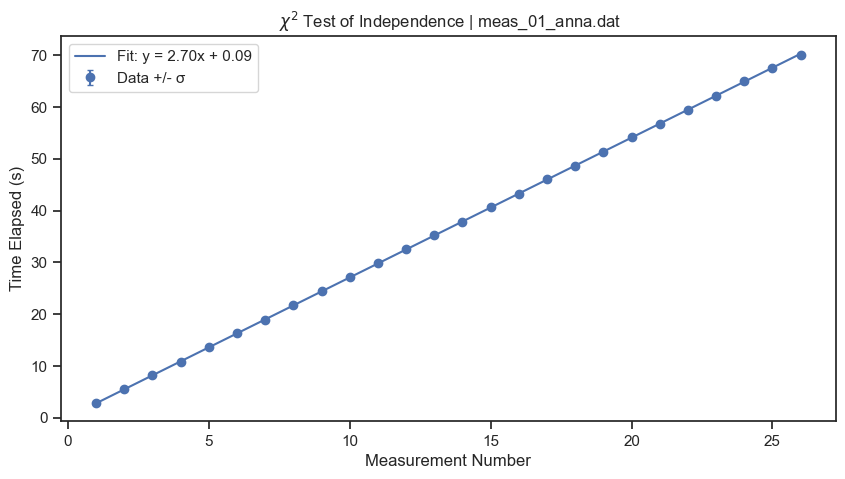

Probability: 0.01
Critical value: 36.42

Chi-squared/Ndof: 39.11/24.00=1.63

P(Chi2 = 39.11, Ndof = 24) = 0.0265825256
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 39.11 (χ²/ndof = 1.6)      │              Nfcn = 70               │
│ EDM = 5.89e-19 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

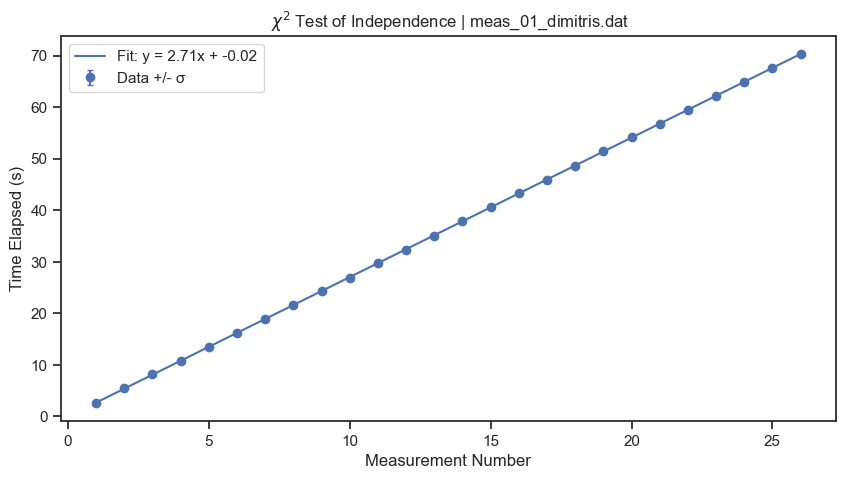

Probability: 0.02
Critical value: 37.65

Chi-squared/Ndof: 35.99/25.00=1.44

P(Chi2 = 35.99, Ndof = 25) = 0.0718087506
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 35.99 (χ²/ndof = 1.4)      │              Nfcn = 70               │
│ EDM = 5.02e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

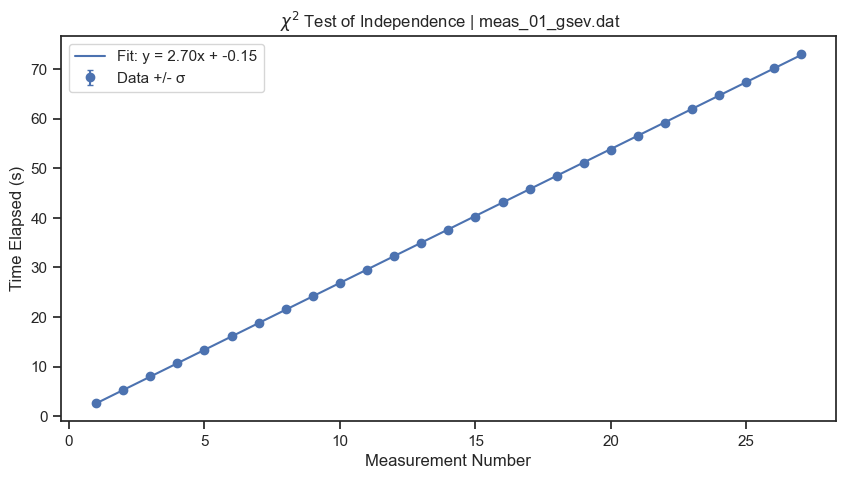

Probability: 0.02
Critical value: 35.17

Chi-squared/Ndof: 31.84/23.00=1.38

P(Chi2 = 31.84, Ndof = 23) = 0.1035142646
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 31.84 (χ²/ndof = 1.4)      │              Nfcn = 50               │
│ EDM = 4.04e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

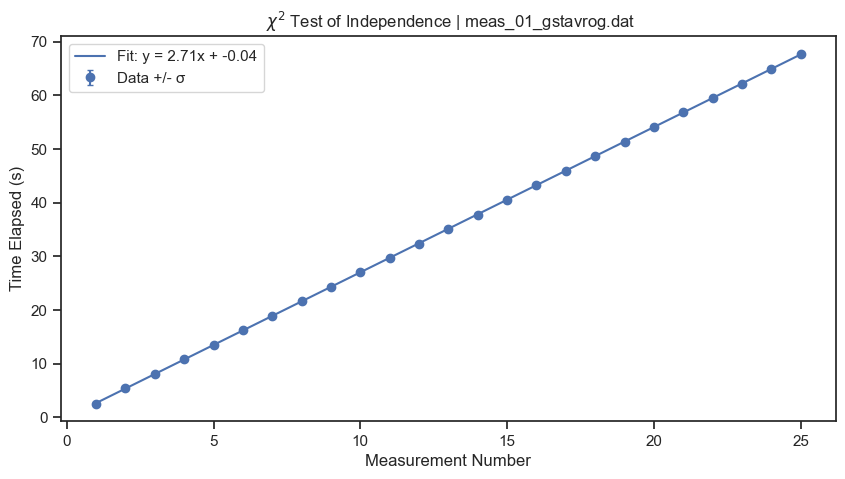

Probability: 0.06
Critical value: 35.17

Chi-squared/Ndof: 23.36/23.00=1.02

P(Chi2 = 23.36, Ndof = 23) = 0.4397318786
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 23.36 (χ²/ndof = 1.0)      │              Nfcn = 50               │
│ EDM = 6.24e-19 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

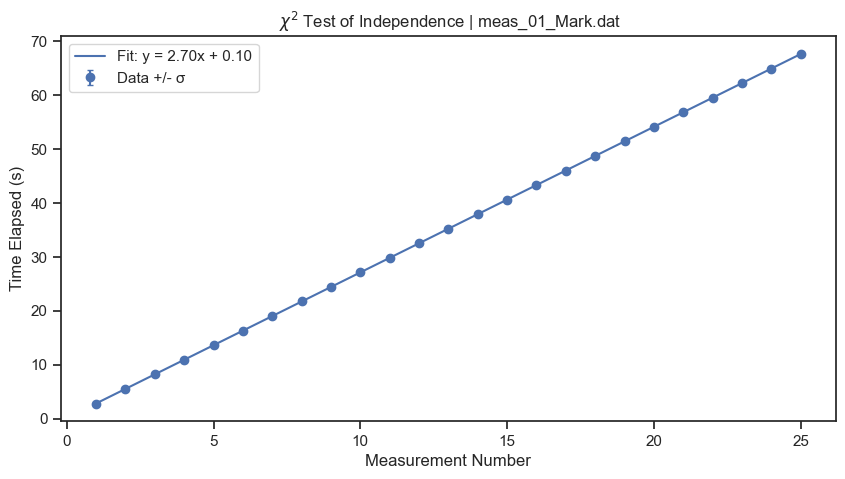

Probability: 0.00
Critical value: 35.17

Chi-squared/Ndof: 47.53/23.00=2.07

P(Chi2 = 47.53, Ndof = 23) = 0.0019229983
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 47.53 (χ²/ndof = 2.1)      │              Nfcn = 54               │
│ EDM = 2.15e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

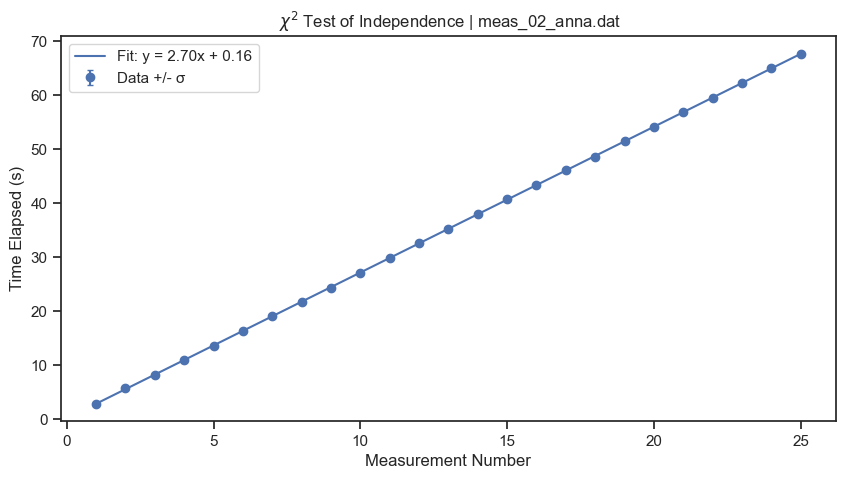

Probability: 0.02
Critical value: 35.17

Chi-squared/Ndof: 33.69/23.00=1.46

P(Chi2 = 33.69, Ndof = 23) = 0.0698200157
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 33.69 (χ²/ndof = 1.5)      │              Nfcn = 68               │
│ EDM = 6.86e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

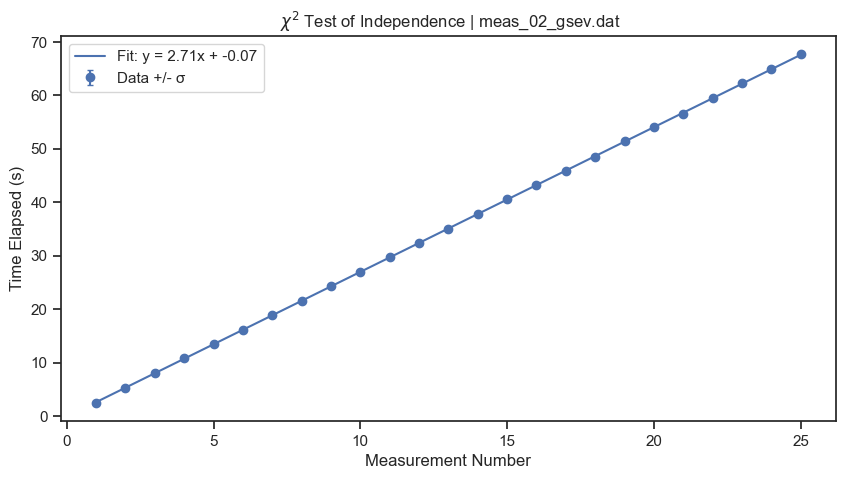

Probability: 0.01
Critical value: 36.42

Chi-squared/Ndof: 38.88/24.00=1.62

P(Chi2 = 38.88, Ndof = 24) = 0.0281288492
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 38.88 (χ²/ndof = 1.6)      │              Nfcn = 52               │
│ EDM = 1.08e-19 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

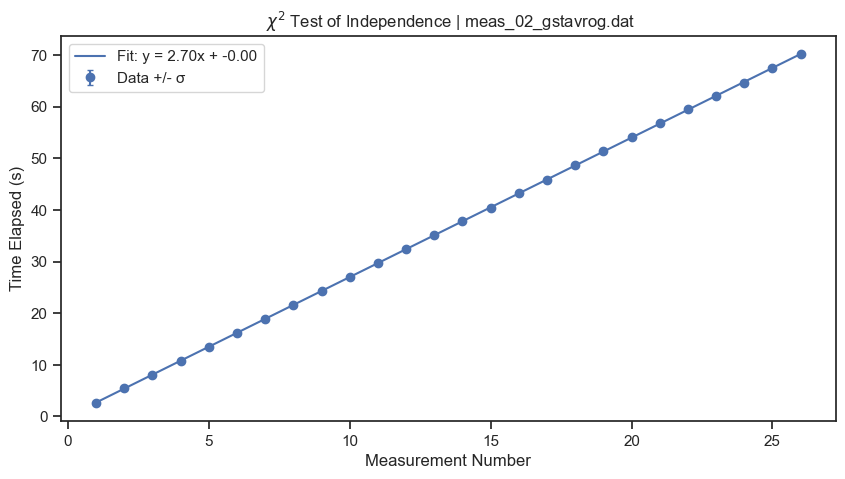

Probability: 0.01
Critical value: 35.17

Chi-squared/Ndof: 36.12/23.00=1.57

P(Chi2 = 36.12, Ndof = 23) = 0.0400716898
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 36.12 (χ²/ndof = 1.6)      │              Nfcn = 68               │
│ EDM = 2.64e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────

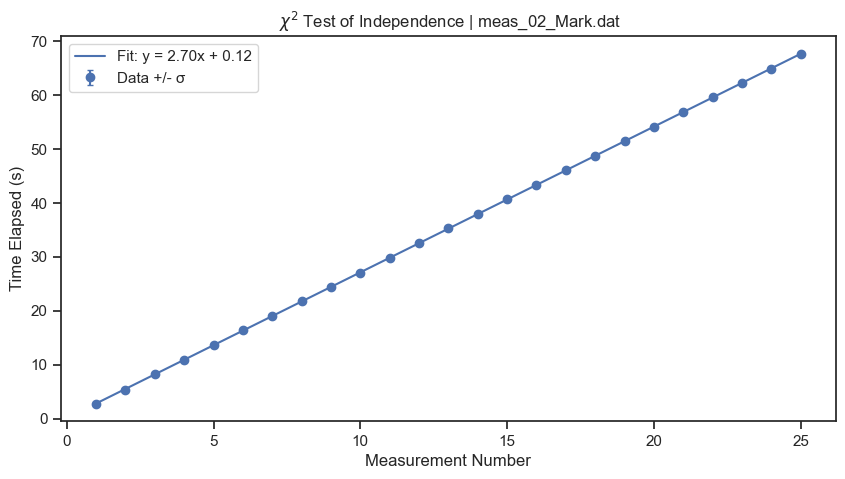

In [223]:
# introducing passed data via local vars
std_devs = std_devs_pass 
std_errs = std_errs_pass
T_mean_values = T_mean_pass


# Chi2 Test of Independece per data series
# Uses same data as the linear fit above 
# - but also inputs the error from each person (time residuals). Correct approach?

import matplotlib.pyplot as plt
import seaborn as sns
from iminuit import Minuit
from iminuit.util import describe
from typing import Annotated
import numpy as np
from scipy.stats import chi2

def model(x, a: float, b: float):
    return a*x + b                # model for predicting t(N) from N -> slope = T_i ?

# Plot each dataframe with y as a function of x
for (filename, df), std_dev, std_err in zip(dataframes.items(), std_devs, std_errs):

    N = df['Oscillation Number']
    t = df['Time']
    # local plotting vars
    x = N
    y = t
    
    # local error variable
    # Use std error on the mean / std deviation from the linear fit
    # - or recalculate the residuals locally?
    error = std_dev
    #error = std_err

    # lsq model form minuit tutorial. Good or bad choice - black box solution?
    least_squares = LeastSquares(x, y, error, model)

    # Create a Minuit object
    m = Minuit(least_squares, a=0, b=0)

    # finds minimum of least_squares function
    # Using the simplex method first (followed by Migrad) can be useful for asymptotes. Might apply to the GoF case?
    # Read about simplex here: https://iminuit.readthedocs.io/en/stable/notebooks/basic.html
    #m.simplex().migrad()
    m.migrad()

    # Get the best fit parameters
    a = m.values['a']
    b = m.values['b']

    # Degrees of freedom variable
    Ndof = len(y) - len(m.values[:])

    # Calculate the Chi-squared value
    chi2_value = m.fval 

    # Calculate the p-value
    p_value = chi2.sf(chi2_value, df=Ndof) 

    # Calculate the critical value
    crit_value = chi2.isf(.05, df=Ndof)

    # Calculate the probability
    Chi2_prob = chi2.pdf(chi2_value, df=Ndof)

    # Print the Chi-squared value and the p-value
    print(f"Probability: {Chi2_prob:.2f}")
    print(f"Critical value: {crit_value:.2f}")
    print(f"\nChi-squared/Ndof: {chi2_value:.2f}/{Ndof:.2f}={(chi2_value / Ndof):.2f}") 
    print(f"\nP(Chi2 = {chi2_value:.2f}, Ndof = {Ndof:d}) = {p_value:6.10f}")

    # Create a scatter plot of the mean values with error bars
    plt.figure(figsize=(10, 5))
    plt.errorbar(x, y, yerr=error, fmt='o', label='Data +/- σ', capsize=2)

    # Plot the best fit line
    #x = np.arange(len(T_mean_values))
    plt.plot(x, model(x, a, b), color=my_palette[0], label=f'Fit: y = {a:.2f}x + {b:.2f}')

    # plot the mean # values from lin fit?
    #x = np.arange(len(T_mean_values))
    #y = np.ones_like(x) * weighted_mean
    #plt.plot(x, y, "r:", dashes=(5, 10), label='Mean')

    #x = np.arange(len(T_mean_values))
    #y = (np.ones_like(x) * weighted_mean ) - uncertainty_weighted_mean
    #x = np.arange(len(T_mean_values))
    #y = (np.ones_like(x) * weighted_mean ) + uncertainty_weighted_mean
    #plt.fill_between(x, weighted_mean-uncertainty_weighted_mean, weighted_mean+uncertainty_weighted_mean, color='gray', alpha=0.2, label='Uncertainty on Weighted Mean')

    ####################################################################
    ############ use SNS to fill area between mean and chi2 fit !!!!  ##
    ####################################################################

    print(m.migrad())

    plt.title(fr' $\chi^2$ Test of Independence | {filename}')
    plt.xlabel('Measurement Number')
    plt.ylabel('Time Elapsed (s)')
    plt.legend()
    plt.show()

In [ ]:
# introducing passed data via local vars
std_devs = std_devs_pass 
std_errs = std_errs_pass
T_mean_values = T_mean_pass

# Chi2 GoF test for whole dataset

import matplotlib.pyplot as plt
import seaborn as sns
from iminuit import Minuit
from iminuit.util import describe
from typing import Annotated
import numpy as np
from scipy.stats import chi2
from iminuit.cost import LeastSquares

# Local error variable
#errors = std_errs
errors = std_devs

# Model for returning a constant value (?)
#def model(x, b: float):
#    b = np.ones_like(T_mean_values) * weighted_mean
#    return b

# Linear model
def model(x, a: float, b: float):
    return a + b * x

# custom cost model from definition of chi2
# Define the cost function (Chi-squared)
#def chi_squared(b, x, y, y_err):
#    y_model = model(x, b)
#    return np.sum(((y - y_model) / y_err) ** 2)

# built-in cost function imported via iminuit.cost
least_squares = LeastSquares(np.arange(len(T_mean_values)).tolist(), T_mean_values, errors, model)

# Create a Minuit object
#m = Minuit(lambda b: chi_squared(b, np.arange(len(T_mean_values)), T_mean_values, errors), b=0)
#m = Minuit(lambda a, b: chi_squared(a, b, N, t, error), a=0, b=0)
m = Minuit(least_squares, a=0, b=0)

# finds the minimum of the Minuit object
# Using the simplex method first (followed by Migrad) can be useful for asymptotes. Might apply to this GoF case?
# Read about simplex here: https://iminuit.readthedocs.io/en/stable/notebooks/basic.html
m.simplex().migrad()

# Get the best fit parameters
a = m.values['a']
b = m.values['b']

# Calculate the Chi-squared value
chi2_value = m.fval #chi_squared(b, np.arange(len(T_mean_values)), T_mean_values, std_errs)

# Calculate the p-value
p_value = chi2.sf(chi2_value, df=(len(T_mean_values) - len(m.values[:]))) 

# Calculate the critical value
crit_value = chi2.isf(.05, df=(len(T_mean_values) - len(m.values[:])))

# Calculate the probability
Chi2_prob = chi2.pdf(chi2_value, df=(len(T_mean_values) - len(m.values[:])))

#Ndof = len(T_mean_values) - len(m.values[:])
Ndof = len(T_mean_values) - 1

# Print the Chi-squared value and the p-value
print(f"Probability: {Chi2_prob}")
print(f"Critical value: {crit_value}")
print(f"\nChi-squared/Ndof: {chi2_value / Ndof}") 
print(f"\nProb(Chi2 = {chi2_value:.2f}, Ndof = {Ndof:d}) = {p_value:6.4f}")
print(f'\nFit: y = {a:.5f}x + {b:.5f}')

# Create a scatter plot of the mean values with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(np.arange(len(T_mean_values)), T_mean_values, yerr=errors, fmt='o', label='Mean +/- σ', capsize=2)

# Plot the best fit line
x = np.arange(len(T_mean_values))
plt.plot(x, model(x, a, b), color=my_palette[0], label=f'Fit: y = {a:.2f}x + {b:.2f}')

# plot the weighted mean
x = np.arange(len(T_mean_values))
y = np.ones_like(x) * weighted_mean
plt.plot(x, y, "r:", dashes=(5, 10), label='Weighted Mean')

x = np.arange(len(T_mean_values))
y = (np.ones_like(x) * weighted_mean ) - uncertainty_weighted_mean
x = np.arange(len(T_mean_values))
y = (np.ones_like(x) * weighted_mean ) + uncertainty_weighted_mean
plt.fill_between(x, weighted_mean-uncertainty_weighted_mean, weighted_mean+uncertainty_weighted_mean, color='gray', alpha=0.2, label='Uncertainty on Weighted Mean')

#N_values = np.linspace(min(N), max(N), 100)
#plt.fill_between(N_values, -error, error, color='gray', alpha=0.2)
####################################################################
############ use SNS to fill area between mean and chi2 fit !!!!  ##
####################################################################

plt.title(r' $\chi^2$ Test for Goodness of Fit')
plt.xlabel('Index')
plt.ylabel('Mean value')
plt.legend()
plt.show()

print(m.simplex().migrad())